In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Winni Reports.csv')
df.head(10)

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration
0,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,2:40
1,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,2:40
2,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,7:15,small mouth bass,NaN,20.0,NaN,6:20,9:00,2:40
3,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,2:40
4,2015,8/28/2015,65.0,76.3,NaN,8,nw,partly sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,3:15
5,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:00,salmon,18.0,2.0,NaN,8:00,11:00,3:00
6,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:15,salmon,19.0,2.0,NaN,8:00,11:00,3:00
7,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:30,salmon,18.0,2.0,NaN,8:00,11:00,3:00
8,2015,4/27/2015,NaN,40.3,NaN,0,NaN,windy,east of little bear bay,7:00,salmon,NaN,21.5,NaN,7:00,11:30,4:30
9,2015,4/27/2015,NaN,40.3,NaN,0,NaN,windy,east of little bear bay,8:00,salmon,NaN,2.0,NaN,7:00,11:30,4:30


In [3]:
df.shape

(455, 17)

In [4]:
df.dtypes

year                     object
date                     object
air_temp_f              float64
water_temp_f            float64
thermocline_depth_ft    float64
wind_speed_mph            int64
wind_dir                 object
weather                  object
location                 object
time                     object
fish_type                object
fish_length_in          float64
water_depth_ft          float64
skunked                  object
lines_in                 object
lines_out                object
duration                 object
dtype: object

In [5]:
df.isnull().sum()

year                      0
date                      0
air_temp_f               51
water_temp_f             36
thermocline_depth_ft    419
wind_speed_mph            0
wind_dir                 68
weather                  20
location                  0
time                     72
fish_type                72
fish_length_in           81
water_depth_ft           92
skunked                 383
lines_in                  0
lines_out                 0
duration                  0
dtype: int64

In [6]:
def rough_location(col):
    name_list = []
    directions = ['east', 'west', 'north', 'south', 'of']

    for i in col.split():
        if i not in directions:
            name_list.append(i)
    return ' '.join(name_list)

In [7]:
df['location2'] = df['location'].map(lambda x: rough_location(x))

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['wind_dir'].value_counts()

nw     137
sw     121
w       37
se      31
ne      27
s       20
e       10
n        3
ene      1
Name: wind_dir, dtype: int64

In [10]:
df.loc[(df['wind_dir'] == 'ene')]

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
321,2018,2018-05-27,57.0,59.3,NaN,15,ene,overcast,west of timber,8:10,lake trout,20.0,27.0,NaN,7:50,10:45,2:55,timber


In [11]:
df.at[321,'wind_dir']= 'ne'

In [12]:
df['weather'].value_counts() # combine rainy and raining?

sunny           247
overcast         90
cloudy           35
hazy             24
calm              8
raining           7
fog               7
windy             6
partly sunny      5
rainy             4
slight wind       2
Name: weather, dtype: int64

In [13]:
df['location'].value_counts()

north of diamond           111
north of welch              58
harilla bay                 37
south of welch              36
north of lockes             33
east of lockes              23
east of welch               20
saunders bay                17
south of sandy              16
alton bay                   13
little bear bay             10
diamond                     10
west of witches              9
west of lockes               7
east of witches              5
east of governors            4
west of welch                4
south of witches             4
wolfboro bay                 3
north of sandy               3
welch                        3
east of rattlesnake          3
east of little bear bay      3
south of governors           3
carr point                   2
weirs marina                 2
varney point                 2
north of birch               2
west of timber               2
north of varney              2
west of 6 mile               1
tip of witches               1
east of 

In [14]:
df['fish_type'].value_counts()

salmon              228
rainbow              73
lake trout           64
white perch           8
smallmouth            5
salmon                2
small mouth bass      1
horned pout           1
lake trout            1
Name: fish_type, dtype: int64

In [15]:
def change_fish_type(fish):
    if fish == 'small mouth bass':
        return 'smallmouth'
    elif fish == 'salmon ':
        return 'salmon'
    elif fish == 'lake trout ':
        return 'lake trout'
    return fish

df['fish_type'] = df['fish_type'].map(change_fish_type)

In [16]:
df['fish_length_in'].describe()

count    374.000000
mean      16.814171
std        3.113292
min       10.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       23.000000
Name: fish_length_in, dtype: float64

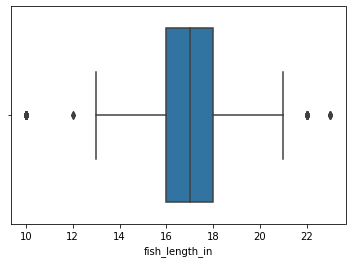

In [17]:
sns.boxplot(x = df['fish_length_in']);

In [18]:
df['water_depth_ft'].describe()

count    363.000000
mean      30.232782
std       21.029418
min        2.000000
25%       20.000000
50%       25.000000
75%       38.500000
max      175.000000
Name: water_depth_ft, dtype: float64

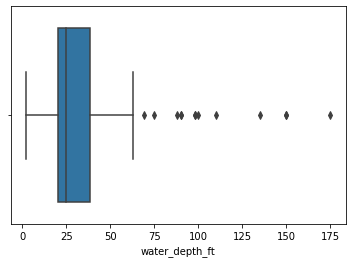

In [19]:
sns.boxplot(x = df['water_depth_ft']);

In [20]:
df['skunked'].value_counts()

True    72
Name: skunked, dtype: int64

In [21]:
df['location'].value_counts()

north of diamond           111
north of welch              58
harilla bay                 37
south of welch              36
north of lockes             33
east of lockes              23
east of welch               20
saunders bay                17
south of sandy              16
alton bay                   13
little bear bay             10
diamond                     10
west of witches              9
west of lockes               7
east of witches              5
east of governors            4
west of welch                4
south of witches             4
wolfboro bay                 3
north of sandy               3
welch                        3
east of rattlesnake          3
east of little bear bay      3
south of governors           3
carr point                   2
weirs marina                 2
varney point                 2
north of birch               2
west of timber               2
north of varney              2
west of 6 mile               1
tip of witches               1
east of 

In [22]:
df.loc[(df['location'].isnull() == True)]

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2


In [23]:
df['location'].isnull().sum()

0

In [24]:
df['location'].value_counts()

north of diamond           111
north of welch              58
harilla bay                 37
south of welch              36
north of lockes             33
east of lockes              23
east of welch               20
saunders bay                17
south of sandy              16
alton bay                   13
little bear bay             10
diamond                     10
west of witches              9
west of lockes               7
east of witches              5
east of governors            4
west of welch                4
south of witches             4
wolfboro bay                 3
north of sandy               3
welch                        3
east of rattlesnake          3
east of little bear bay      3
south of governors           3
carr point                   2
weirs marina                 2
varney point                 2
north of birch               2
west of timber               2
north of varney              2
west of 6 mile               1
tip of witches               1
east of 

In [25]:
df['year'].value_counts()

2015     179
2018     100
2017      70
2019      48
2016      43
2022       9
2020       3
14:30      1
7:40       1
2021       1
Name: year, dtype: int64

In [26]:
df.loc[df['year'] == '14:30']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
24,14:30,2015-05-15,69.0,55.0,NaN,5,nw,NaN,harilla bay,14:30,salmon,18.0,NaN,NaN,14:30,16:20,1:50,harilla bay


In [27]:
df.loc[df['year'] == '7:40']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
203,7:40,2016-08-03,60.0,75.6,NaN,4,sw,sunny,north of lockes,NaN,NaN,NaN,NaN,True,7:40,10:15,2:35,lockes


In [28]:
df.iloc[31, df.columns.get_loc('year')] = 2015
df.iloc[210, df.columns.get_loc('year')] = 2016

In [29]:
df['air_temp_f'].value_counts(ascending = False)

65.0    34
60.0    32
63.0    27
62.0    26
69.0    25
54.0    23
68.0    23
64.0    18
61.0    17
59.0    17
66.0    15
73.0    13
58.0    12
70.0    11
56.0    11
55.0    10
71.0    10
53.0     9
51.0     9
52.0     8
46.0     5
47.0     5
49.0     5
75.0     5
57.0     4
42.0     4
48.0     4
45.0     4
74.0     3
67.0     3
72.0     3
40.0     3
50.0     2
86.0     2
37.0     1
85.0     1
Name: air_temp_f, dtype: int64

In [30]:
df['water_temp_f'].value_counts().sort_index()

39.4     3
40.0     1
40.3     3
41.5     1
41.9     1
42.0     2
42.2     1
42.3     2
43.0     1
43.2     2
44.0     1
44.2     1
44.8     2
44.9     1
45.0     3
45.2     1
45.4     1
45.8     3
45.9     1
46.0     2
48.0     6
48.1     1
48.6     1
48.9     1
50.0     6
52.7     2
52.8     5
53.9     2
54.6     1
55.0     9
55.5     3
55.6     1
56.2     2
56.7     3
56.9     2
57.0     2
57.5     2
57.6     2
57.8     2
58.0     2
59.0     7
59.3     1
60.6     1
61.1     1
62.6     2
62.9     1
63.0     3
63.4     1
63.6     1
64.5     1
64.9     2
65.0     3
65.7     2
66.0     3
66.2     1
66.8     2
67.0     6
67.6     2
67.7     1
68.0     2
68.2     3
68.3     2
68.8     1
69.0     1
69.6     1
70.4     1
70.7     1
70.9     1
71.0     2
71.1     1
71.4     2
71.5     8
71.8     3
72.0     6
72.1     6
72.2     1
72.3     8
72.5     5
72.6     3
72.7     3
73.0     2
73.1     8
73.3     1
73.4     9
73.5     6
73.6     2
73.7     3
73.8     1
74.1     6
74.2     2
74.3     7

In [31]:
df = df.drop(columns = 'thermocline_depth_ft')

In [32]:
df['wind_speed_mph'].describe()

count    455.000000
mean       6.039560
std        3.778938
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       16.000000
Name: wind_speed_mph, dtype: float64

In [33]:
df['weather'].value_counts()

sunny           247
overcast         90
cloudy           35
hazy             24
calm              8
raining           7
fog               7
windy             6
partly sunny      5
rainy             4
slight wind       2
Name: weather, dtype: int64

In [34]:
def change_weather(condition):
    if condition == 'calm' or condition == 'partly sunny':
        return 'sunny'
    elif condition == 'slight wind':
        return 'windy'
    elif condition == 'rainy':
        return 'raining'
    elif condition == 'cloudy':
        return 'overcast'
    return condition

df['weather'] = df['weather'].map(change_weather)

In [35]:
df['weather'].value_counts()

sunny       260
overcast    125
hazy         24
raining      11
windy         8
fog           7
Name: weather, dtype: int64

In [36]:
df['time'].describe()

count      383
unique     133
top       9:00
freq        16
Name: time, dtype: object

In [37]:
df['time'].value_counts()

9:00     16
8:30     13
8:45     12
9:30     11
8:00     10
8:40      8
7:45      8
9:50      8
9:45      8
8:50      8
8:25      8
6:20      7
7:40      7
8:35      7
7:10      7
6:55      7
10:00     7
9:20      6
7:25      6
7:50      6
7:00      6
8:20      6
8:15      6
8:10      6
9:10      6
7:20      6
9:15      5
6:50      5
6:25      4
10:30     4
10:15     4
9:25      4
7:30      4
7:15      4
7:55      4
6:35      4
6:30      3
6:10      3
10:10     3
9:35      3
9:05      3
8:06      3
7:05      3
8:55      3
8:05      3
9:40      3
8:03      2
9:47      2
7:22      2
7:17      2
9:04      2
8:57      2
8:17      2
9:24      2
15:30     2
9:03      2
7:19      2
6:45      2
9:55      2
8:02      2
6:40      2
14:30     2
8:19      2
10:20     2
18:32     1
9:27      1
9:22      1
8:46      1
18:13     1
9:44      1
8:58      1
8:53      1
8:38      1
15:15     1
12:03     1
8:07      1
8:26      1
12:24     1
10:03     1
9:32      1
7:09      1
8:36      1
9:49      1
16:1

In [38]:
df['time2'] = pd.to_datetime(df['time'])
#df['time2'] = df['time2'].dt.time

In [39]:
df['time2'].sort_values()

27    2022-06-08 05:45:00
261   2022-06-08 05:55:00
28    2022-06-08 06:00:00
262   2022-06-08 06:10:00
74    2022-06-08 06:10:00
113   2022-06-08 06:10:00
94    2022-06-08 06:15:00
0     2022-06-08 06:20:00
95    2022-06-08 06:20:00
99    2022-06-08 06:20:00
109   2022-06-08 06:20:00
114   2022-06-08 06:20:00
132   2022-06-08 06:20:00
89    2022-06-08 06:20:00
75    2022-06-08 06:25:00
263   2022-06-08 06:25:00
281   2022-06-08 06:25:00
85    2022-06-08 06:25:00
11    2022-06-08 06:30:00
102   2022-06-08 06:30:00
153   2022-06-08 06:30:00
76    2022-06-08 06:35:00
55    2022-06-08 06:35:00
103   2022-06-08 06:35:00
90    2022-06-08 06:35:00
100   2022-06-08 06:40:00
124   2022-06-08 06:40:00
125   2022-06-08 06:45:00
154   2022-06-08 06:45:00
347   2022-06-08 06:49:00
254   2022-06-08 06:50:00
110   2022-06-08 06:50:00
133   2022-06-08 06:50:00
222   2022-06-08 06:50:00
77    2022-06-08 06:50:00
374   2022-06-08 06:55:00
86    2022-06-08 06:55:00
377   2022-06-08 06:55:00
69    2022-0

In [40]:
df.iloc[451, df.columns.get_loc('skunked')] = True

In [41]:
df.iloc[[451]]

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2,time2
451,2022,2022-04-18,NaN,45.0,7,e,overcast,spindle point,NaN,NaN,NaN,NaN,True,9:30,11:45,2:15,spindle point,NaT


In [42]:
df.iloc[[0]]

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2,time2
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,2:40,lockes,2022-06-08 06:20:00


In [43]:
df['skunked'].describe()

count       72
unique       1
top       True
freq        72
Name: skunked, dtype: object

In [44]:
df['skunked'].value_counts()

True    72
Name: skunked, dtype: int64

In [45]:
df[(df['time'].isnull() == True)]

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2,time2
16,2015,2015-05-01,55.0,44.2,0,NaN,sunny,saunders bay,NaN,NaN,NaN,NaN,True,16:30,18:15,1:45,saunders bay,NaT
17,2015,2015-05-02,42.0,46.0,0,NaN,sunny,harilla bay,NaN,NaN,NaN,NaN,True,6:30,9:45,3:15,harilla bay,NaT
29,2015,2015-06-04,51.0,57.5,6,sw,overcast,north of rattlesnake,NaN,NaN,NaN,NaN,True,5:15,7:45,2:30,rattlesnake,NaT
30,2015,2015-06-04,51.0,57.5,6,sw,overcast,diamond,NaN,NaN,NaN,NaN,True,5:15,7:45,2:30,diamond,NaT
36,2015,2015-06-12,66.0,63.6,8,nw,overcast,north of diamond,NaN,NaN,NaN,NaN,True,7:15,9:10,1:55,diamond,NaT
39,2015,2015-06-26,59.0,68.0,10,sw,overcast,east of witches,NaN,NaN,NaN,NaN,True,6:45,8:30,1:45,witches,NaT
41,2015,2015-07-03,58.0,68.3,8,nw,sunny,east of welch,NaN,NaN,NaN,NaN,True,7:55,10:20,2:25,welch,NaT
45,2015,2015-07-07,69.0,70.4,0,NaN,overcast,north of diamond,NaN,NaN,NaN,NaN,True,7:30,9:15,1:45,diamond,NaT
51,2015,2015-07-13,69.0,74.3,3,nw,sunny,welch,NaN,NaN,NaN,NaN,True,7:00,9:00,2:00,welch,NaT
54,2015,2015-07-17,53.0,73.3,5,nw,NaN,south of sandy,NaN,NaN,NaN,NaN,True,6:20,7:45,1:25,sandy,NaT


In [46]:
#df['lines_in'] = pd.to_datetime(df['lines_in'])
#df['lines_in'] = df['lines_in'].dt.time

In [47]:
#df['lines_out'] = pd.to_datetime(df['lines_out'])
#df['lines_out'] = df['lines_out'].dt.time

In [48]:
df.at[4,'lines_out']='10:30'
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2,time2
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,2:40,lockes,2022-06-08 06:20:00
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,2:40,lockes,2022-06-08 07:00:00
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,2:40,lockes,2022-06-08 07:15:00
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,2:40,lockes,2022-06-08 08:40:00
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,3:15,diamond,2022-06-08 07:45:00


In [49]:
df.dtypes

year                      object
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time                      object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                   object
lines_in                  object
lines_out                 object
duration                  object
location2                 object
time2             datetime64[ns]
dtype: object

In [50]:
df['duration'] =  pd.to_datetime(df['duration'])

In [51]:
df['minutes'] = df['duration'].dt.hour * 60 + df['duration'].dt.minute + df['duration'].dt.second/60
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2,time2,minutes
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,2022-06-08 02:40:00,lockes,2022-06-08 06:20:00,160.0
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,2022-06-08 02:40:00,lockes,2022-06-08 07:00:00,160.0
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,2022-06-08 02:40:00,lockes,2022-06-08 07:15:00,160.0
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,2022-06-08 02:40:00,lockes,2022-06-08 08:40:00,160.0
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,2022-06-08 03:15:00,diamond,2022-06-08 07:45:00,195.0


In [52]:
df.drop(columns = 'duration', inplace = True)

In [53]:
df['minutes'].value_counts().sort_index()

20.0      1
45.0      4
60.0      5
65.0      3
66.0      1
70.0      1
75.0      4
85.0      4
90.0     16
95.0      1
100.0     6
105.0    14
110.0    11
115.0     6
120.0    25
125.0    12
135.0    27
140.0     3
145.0     7
150.0    24
155.0     3
160.0     6
165.0    31
170.0     7
175.0     7
180.0    55
185.0     9
190.0    12
195.0    22
200.0     5
205.0     2
210.0    18
215.0     4
225.0    16
235.0     5
240.0    26
250.0    10
255.0    10
265.0     4
270.0     3
275.0     4
280.0     3
285.0     7
295.0     2
315.0     5
350.0     4
Name: minutes, dtype: int64

## Imputing NaNs

In [54]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,lockes,2022-06-08 06:20:00,160.0
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,lockes,2022-06-08 07:00:00,160.0
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,lockes,2022-06-08 07:15:00,160.0
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,lockes,2022-06-08 08:40:00,160.0
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,diamond,2022-06-08 07:45:00,195.0


In [55]:
df.dtypes

year                      object
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time                      object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                   object
lines_in                  object
lines_out                 object
location2                 object
time2             datetime64[ns]
minutes                  float64
dtype: object

In [56]:
df.isnull().sum()

year                0
date                0
air_temp_f         51
water_temp_f       36
wind_speed_mph      0
wind_dir           68
weather            20
location            0
time               72
fish_type          72
fish_length_in     81
water_depth_ft     92
skunked           383
lines_in            0
lines_out           0
location2           0
time2              72
minutes             0
dtype: int64

In [57]:
df['air_temp_f'].describe()

count    404.000000
mean      61.398515
std        7.667540
min       37.000000
25%       56.000000
50%       62.000000
75%       66.000000
max       86.000000
Name: air_temp_f, dtype: float64

In [58]:
df['month'] = df['date'].dt.month

In [59]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes,month
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,lockes,2022-06-08 06:20:00,160.0,8
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,lockes,2022-06-08 07:00:00,160.0,8
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,lockes,2022-06-08 07:15:00,160.0,8
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,lockes,2022-06-08 08:40:00,160.0,8
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,diamond,2022-06-08 07:45:00,195.0,8


In [60]:
air_temp_dict = df.groupby('month')['air_temp_f'].mean().to_dict()

In [61]:
water_temp_dict = df.groupby('month')['water_temp_f'].mean().to_dict()

In [63]:
df.isnull().sum()

year                0
date                0
air_temp_f         51
water_temp_f       36
wind_speed_mph      0
wind_dir           68
weather            20
location            0
time               72
fish_type          72
fish_length_in     81
water_depth_ft     92
skunked           383
lines_in            0
lines_out           0
location2           0
time2              72
minutes             0
month               0
dtype: int64

In [64]:
df['air_temp_f'] = df['air_temp_f'].fillna(df['month'].map(air_temp_dict))
df['water_temp_f'] = df['water_temp_f'].fillna(df['month'].map(water_temp_dict))

In [65]:
df['wind_dir'].fillna('no_wind', inplace=True)

In [66]:
df['weather'].value_counts()

sunny       260
overcast    125
hazy         24
raining      11
windy         8
fog           7
Name: weather, dtype: int64

In [67]:
df['skunked'].fillna(False, inplace = True)

In [68]:
fish_length_dict = df.groupby('fish_type')['fish_length_in'].mean().to_dict()
df['fish_length_in'] = df['fish_length_in'].fillna(df['fish_type'].map(fish_length_dict))

In [69]:
df['weather'].fillna('no_weather_recorded', inplace = True)
df['time'].fillna('no_time_recorded', inplace = True)
df['fish_type'].fillna('no_fish_caught', inplace = True)
df['fish_length_in'].fillna('no_recording', inplace = True)
df['water_depth_ft'].fillna('no_fish_caught', inplace = True)

In [70]:
df.isnull().sum()

year               0
date               0
air_temp_f         0
water_temp_f       0
wind_speed_mph     0
wind_dir           0
weather            0
location           0
time               0
fish_type          0
fish_length_in     0
water_depth_ft     0
skunked            0
lines_in           0
lines_out          0
location2          0
time2             72
minutes            0
month              0
dtype: int64

In [71]:
df.dtypes

year                      object
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time                      object
fish_type                 object
fish_length_in            object
water_depth_ft            object
skunked                     bool
lines_in                  object
lines_out                 object
location2                 object
time2             datetime64[ns]
minutes                  float64
month                      int64
dtype: object

In [72]:
df.rename(columns = {'minutes': 'duration_min', 'location2': 'general_loc', 'time':'time_caught'}, inplace = True)
df.drop(columns = 'time2', inplace = True)

In [73]:
df['hour'] = df['time_caught'].map(lambda x:re.search(r'.*(?=:)',x)[0] if x != 'no_time_recorded' else 0)

In [74]:
df['hour'] = df['hour'].astype(int)

In [75]:
df['time_caught_bucket'] = pd.cut(df['hour'], bins=range(5, 18, 2), right=False)

In [76]:
df['hour'].value_counts().sort_values()

5       2
18      2
16      3
15      4
14      5
11      5
12      7
10     29
6      40
0      72
7      74
9      93
8     119
Name: hour, dtype: int64

In [77]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"
